# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

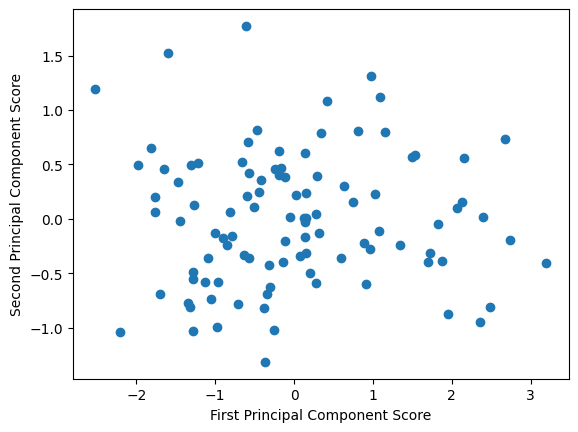

In [93]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

Answer : The outliers in the corner show a low PC1 score that is low. On the contrary, their PC2 values are high. The primary advantage for this graph is that it is demonstrating correlation from a three dimensional graph to one that is two. Given this information, it is hard to be sure that this data is then accurate to interpret. It is difficult to interpret individual values due to the combination of all of the data from the original three series. 

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

In [94]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

#https://drive.google.com/file/d/1evYscqQvK7GoxiyRKmNcHuYrpmudH3il/view
#healthcare topic: 3. Identifying Risk Factors Across Chronic Diseases: 



In [95]:

Kidney= pd.read_csv(r"C:\Users\cotil\OneDrive\Desktop\OMDS Mod B HW\Milestone 3 Datasets\Chronic_Kidney_Dsease_data.csv")
Diabetes= pd.read_csv(r"C:\Users\cotil\OneDrive\Desktop\OMDS Mod B HW\Milestone 3 Datasets\DiabetesHealthcare.csv")
Hypertension= pd.read_csv(r"C:\Users\cotil\OneDrive\Desktop\OMDS Mod B HW\Milestone 3 Datasets\hypertension_dataset.csv")

In [96]:
Kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1659 non-null   int64  
 1   Age                            1659 non-null   int64  
 2   Gender                         1659 non-null   int64  
 3   Ethnicity                      1659 non-null   int64  
 4   SocioeconomicStatus            1659 non-null   int64  
 5   EducationLevel                 1659 non-null   int64  
 6   BMI                            1659 non-null   float64
 7   Smoking                        1659 non-null   int64  
 8   AlcoholConsumption             1659 non-null   float64
 9   PhysicalActivity               1659 non-null   float64
 10  DietQuality                    1659 non-null   float64
 11  SleepQuality                   1659 non-null   float64
 12  FamilyHistoryKidneyDisease     1659 non-null   i

In [97]:
Kidney

PatientID  Age  Gender  Ethnicity  SocioeconomicStatus  EducationLevel  \
0             1   71       0          0                    0               2   
1             2   34       0          0                    1               3   
2             3   80       1          1                    0               1   
3             4   40       0          2                    0               1   
4             5   43       0          1                    1               2   
...         ...  ...     ...        ...                  ...             ...   
1654       1655   90       0          0                    1               2   
1655       1656   34       0          0                    2               1   
1656       1657   84       0          0                    2               3   
1657       1658   90       0          0                    2               2   
1658       1659   34       1          1                    0               0   

            BMI  Smoking  AlcoholConsumption  PhysicalActivity  ...   Itching  \
0     31.069414        1            5.128112          1.676220  ...  7.556302   
1     29.692119        1           18.609552          8.377574  ...  6.836766   
2     37.394822        1           11.882429          9.607401  ...  2.144722   
3     31.329680        0           16.020165          0.408871  ...  7.077188   
4     23.726311        0            7.944146          0.780319  ...  3.553118   
...         ...      ...                 ...               ...  ...       ...   
1654  39.677059        1            1.370151          4.157954  ...  2.138976   
1655  28.922015        0            3.372073          9.647525  ...  7.911566   
1656  21.951219        0           15.825955          7.349964  ...  0.015531   
1657  24.964149        0           12.967462          0.618614  ...  3.432765   
1658  19.253258        1           11.396510          7.446314  ...  9.293499   

      QualityOfLifeScore  HeavyMetalsExposure  OccupationalExposureChemicals  \
0              76.076800                    0                              0   
1              40.128498                    0                              0   
2              92.872842                    0                              1   
3              90.080321                    0                              0   
4               5.258372                    0                              0   
...                  ...                  ...                            ...   
1654           81.102765                    0                              0   
1655           10.600428                    0                              1   
1656           69.633427                    0                              0   
1657           31.858023                    0                              0   
1658           82.314878                    0                              0   

      WaterQuality  MedicalCheckupsFrequency  MedicationAdherence  \
0                1                  1.018824             4.966808   
1                0                  3.923538             8.189275   
2                1                  1.429906             7.624028   
3                0                  3.226416             3.282688   
4                1                  0.285466             3.849498   
...            ...                       ...                  ...   
1654             0                  0.951836             9.547583   
1655             0                  3.604147             1.609847   
1656             0                  0.801955             5.768617   
1657             0                  0.560298             2.744519   
1658             0                  1.754852             0.186400   

      HealthLiteracy  Diagnosis  DoctorInCharge  
0           9.871449          1    Confidential  
1           7.161765          1    Confidential  
2           7.354632          1    Confidential  
3           6.629587          1    Confidential  
4           1.437385          1 

In [98]:
Kidney.to_numpy

<bound method DataFrame.to_numpy of       PatientID  Age  Gender  Ethnicity  SocioeconomicStatus  EducationLevel  \
0             1   71       0          0                    0               2   
1             2   34       0          0                    1               3   
2             3   80       1          1                    0               1   
3             4   40       0          2                    0               1   
4             5   43       0          1                    1               2   
...         ...  ...     ...        ...                  ...             ...   
1654       1655   90       0          0                    1               2   
1655       1656   34       0          0                    2               1   
1656       1657   84       0          0                    2               3   
1657       1658   90       0          0                    2               2   
1658       1659   34       1          1                    0               0   

   

In [99]:
len(Kidney.columns)
#54 Columns


54

In [100]:
Kidney.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus',
       'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption',
       'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension',
       'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury',
       'UrinaryTractInfections', 'SystolicBP', 'DiastolicBP',
       'FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 'BUNLevels', 'GFR',
       'ProteinInUrine', 'ACR', 'SerumElectrolytesSodium',
       'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium',
       'SerumElectrolytesPhosphorus', 'HemoglobinLevels', 'CholesterolTotal',
       'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
       'ACEInhibitors', 'Diuretics', 'NSAIDsUse', 'Statins',
       'AntidiabeticMedications', 'Edema', 'FatigueLevels', 'NauseaVomiting',
       'MuscleCramps', 'Itching', 'QualityOfLifeScore', 'HeavyMetalsExposure',
       'OccupationalExposureChemicals', 'WaterQu

HEATMAPS:



<Axes: >

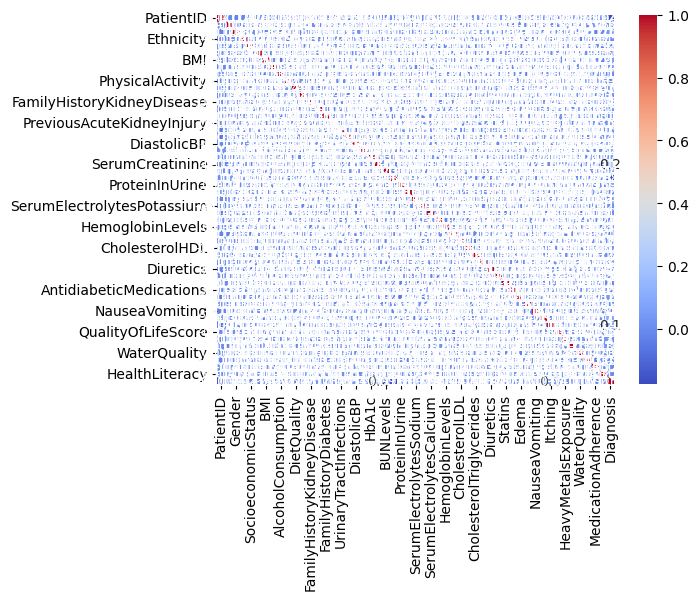

In [101]:
KidneyNum= Kidney.select_dtypes(include=['number'])
corr1= KidneyNum.corr()
sns.heatmap(corr1, annot= True, cmap= 'coolwarm')

<Axes: >

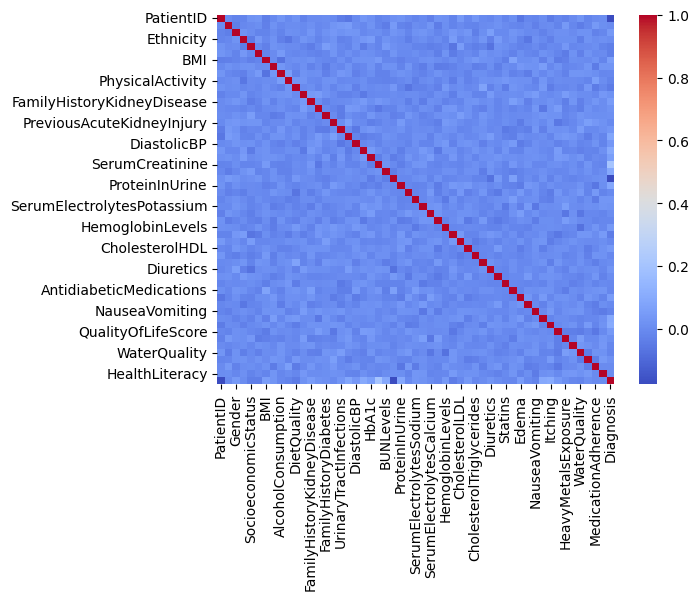

In [102]:
sns.heatmap(corr1, cmap='coolwarm', annot=False)

<Axes: >

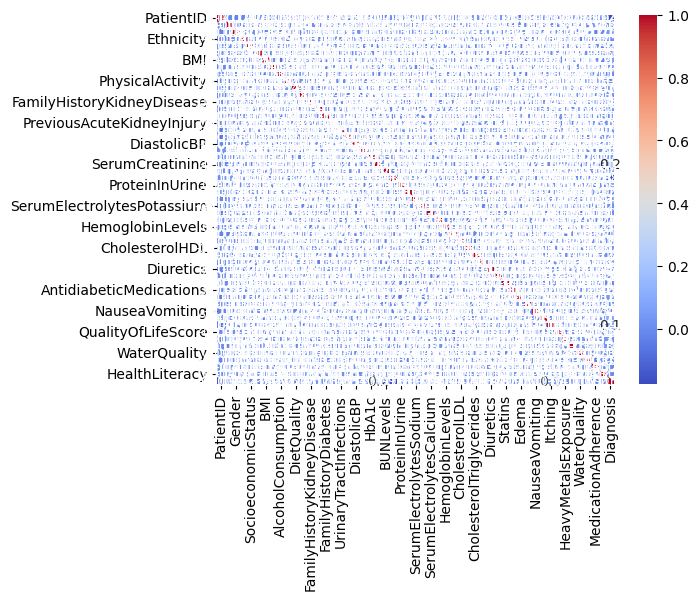

In [103]:
Diabetesnum= Diabetes.select_dtypes(include=['number'])
corr2= Diabetesnum.corr()
sns.heatmap(corr1, annot= True, cmap= 'coolwarm')

<Axes: >

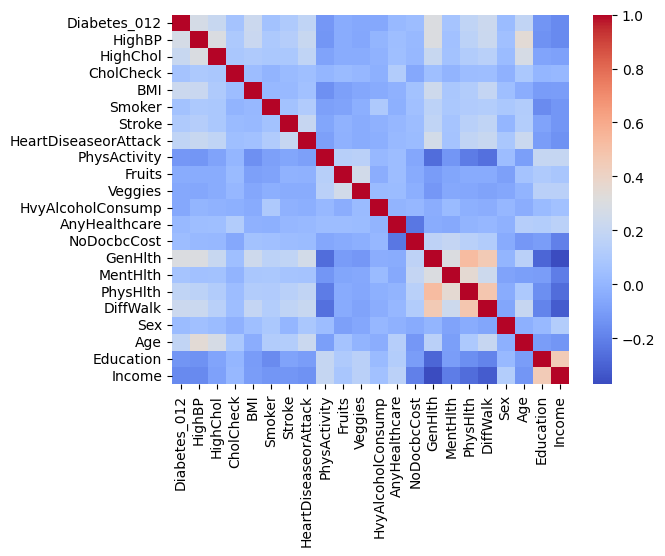

In [104]:
sns.heatmap(corr2, cmap='coolwarm', annot=False)

<Axes: >

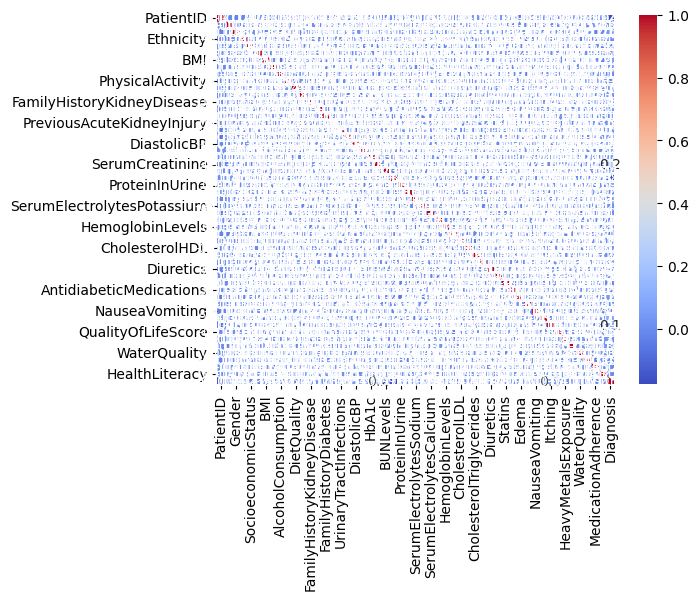

In [105]:
Hypertensionsnum= Hypertension.select_dtypes(include=['number'])
corr3= Hypertensionsnum.corr()
sns.heatmap(corr1, annot= True, cmap= 'coolwarm')

<Axes: >

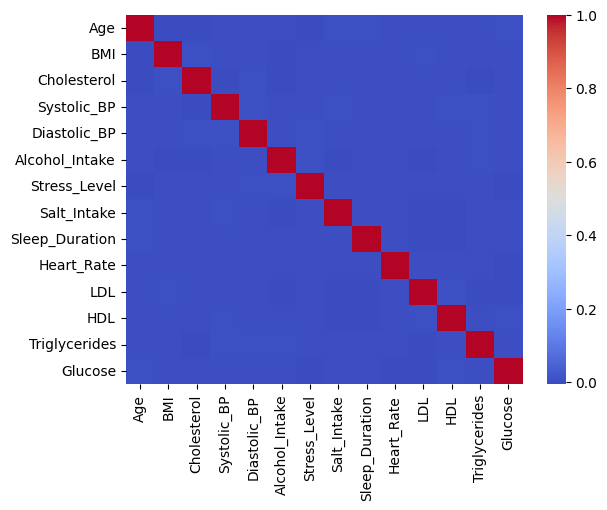

In [106]:
sns.heatmap(corr3, cmap='coolwarm', annot=False)

BUBBLE PLOT:


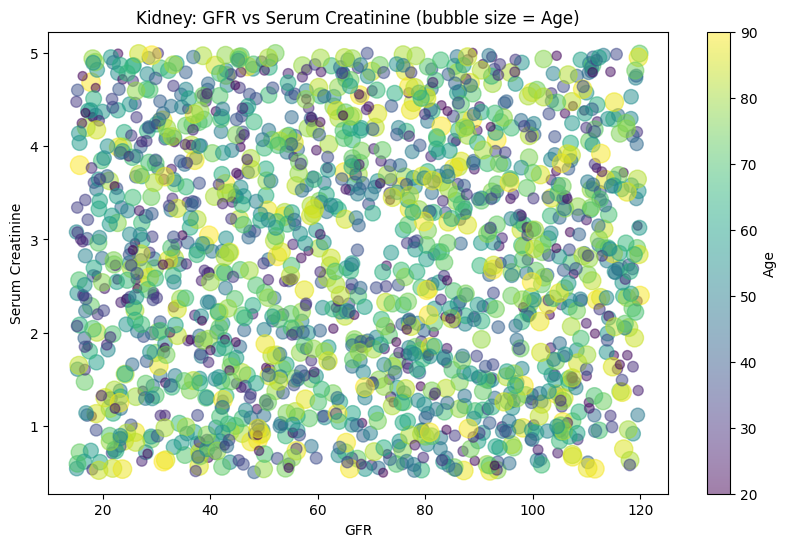

In [107]:
Kidbubble = Kidney[['GFR', 'SerumCreatinine', 'Age']].dropna()

plt.figure(figsize=(10,6))
plt.scatter(Kidbubble['GFR'], Kidbubble['SerumCreatinine'], 
            s=Kidbubble['Age']*2, alpha=0.5, c=Kidbubble['Age'], cmap='viridis')
plt.xlabel('GFR')
plt.ylabel('Serum Creatinine')
plt.title('Kidney: GFR vs Serum Creatinine (bubble size = Age)')
plt.colorbar(label='Age')

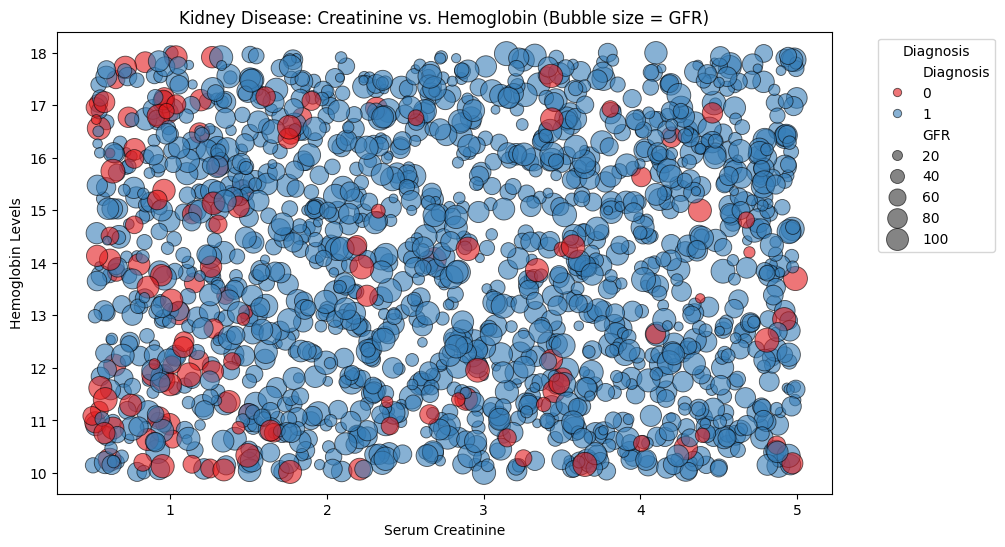

In [108]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=Kidney,
    x='SerumCreatinine',
    y='HemoglobinLevels',
    size='GFR',
    hue='Diagnosis',
    palette='Set1',
    sizes=(40, 300),
    alpha=0.6,
    edgecolor='black'
)
plt.title("Kidney Disease: Creatinine vs. Hemoglobin (Bubble size = GFR)")
plt.xlabel("Serum Creatinine")
plt.ylabel("Hemoglobin Levels")
plt.legend(title='Diagnosis', bbox_to_anchor=(1.05, 1), loc='upper left')


In [109]:
Diabetes.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

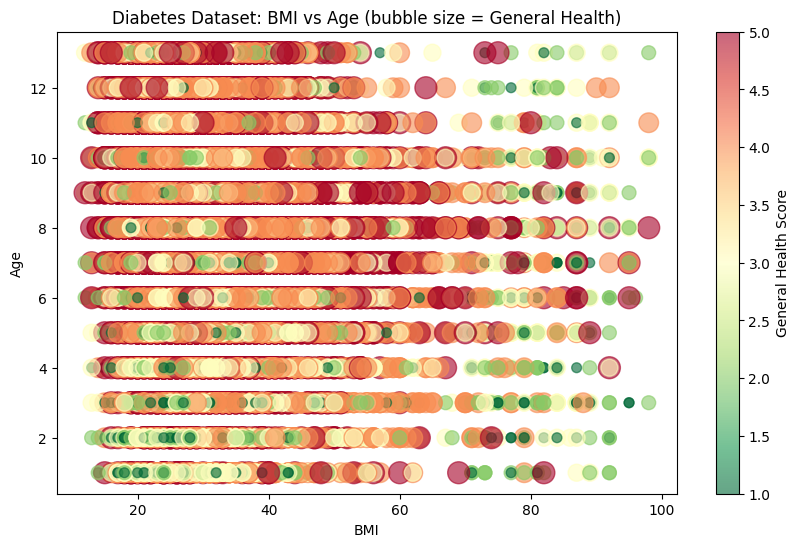

In [110]:

Diabbubble = Diabetes[['BMI', 'Age', 'GenHlth']].dropna()

plt.figure(figsize=(10,6))
plt.scatter(Diabbubble['BMI'],
            Diabbubble['Age'],
            s=Diabbubble['GenHlth'] * 50,  
            alpha=0.6,
            c=Diabbubble['GenHlth'],       
            cmap='RdYlGn_r')              
plt.xlabel('BMI')
plt.ylabel('Age')
plt.title('Diabetes Dataset: BMI vs Age (bubble size = General Health)')
plt.colorbar(label='General Health Score')

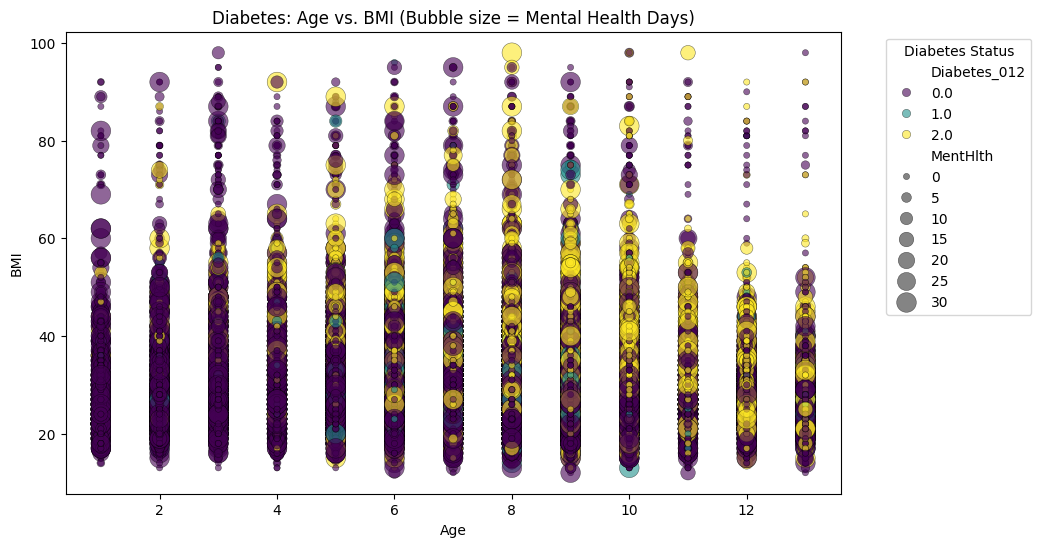

In [111]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=Diabetes,
    x='Age',
    y='BMI',
    size='MentHlth',
    hue='Diabetes_012',
    palette='viridis',
    sizes=(20, 200),
    alpha=0.6,
    edgecolor='k'
)
plt.title("Diabetes: Age vs. BMI (Bubble size = Mental Health Days)")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.legend(title='Diabetes Status', bbox_to_anchor=(1.05, 1), loc='upper left')


In [112]:
Hypertension.columns

Index(['Country', 'Age', 'BMI', 'Cholesterol', 'Systolic_BP', 'Diastolic_BP',
       'Smoking_Status', 'Alcohol_Intake', 'Physical_Activity_Level',
       'Family_History', 'Diabetes', 'Stress_Level', 'Salt_Intake',
       'Sleep_Duration', 'Heart_Rate', 'LDL', 'HDL', 'Triglycerides',
       'Glucose', 'Gender', 'Education_Level', 'Employment_Status',
       'Hypertension'],
      dtype='object')

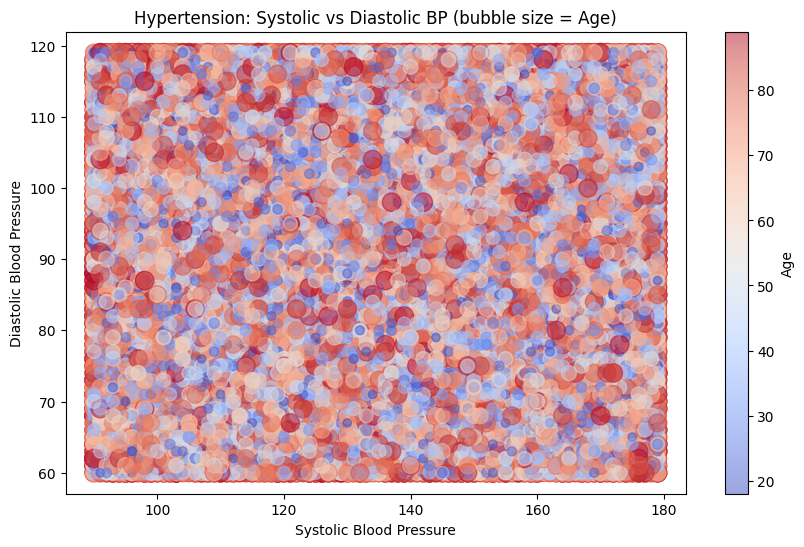

In [113]:
HyperBubble = Hypertension[['Systolic_BP', 'Diastolic_BP', 'Age']].dropna()

plt.figure(figsize=(10,6))
plt.scatter(HyperBubble['Systolic_BP'],
            HyperBubble['Diastolic_BP'],
            s=HyperBubble['Age'] * 2,  
            alpha=0.5,
            c=HyperBubble['Age'],
            cmap='coolwarm')

plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Diastolic Blood Pressure')
plt.title('Hypertension: Systolic vs Diastolic BP (bubble size = Age)')
plt.colorbar(label='Age')

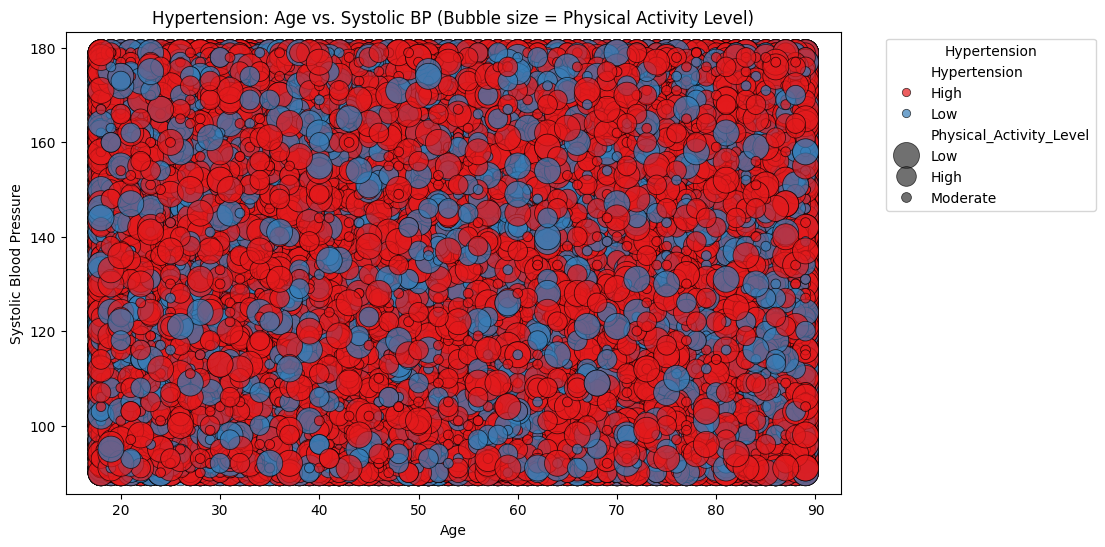

In [114]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=Hypertension,
    x='Age',
    y='Systolic_BP',
    size='Physical_Activity_Level',
    hue='Hypertension',
    palette='Set1',
    sizes=(50, 350),
    alpha=0.7,
    edgecolor='black'
)
plt.title("Hypertension: Age vs. Systolic BP (Bubble size = Physical Activity Level)")
plt.xlabel("Age")
plt.ylabel("Systolic Blood Pressure")
plt.legend(title='Hypertension', bbox_to_anchor=(1.05, 1), loc='upper left')


#Can't make a confident assumption

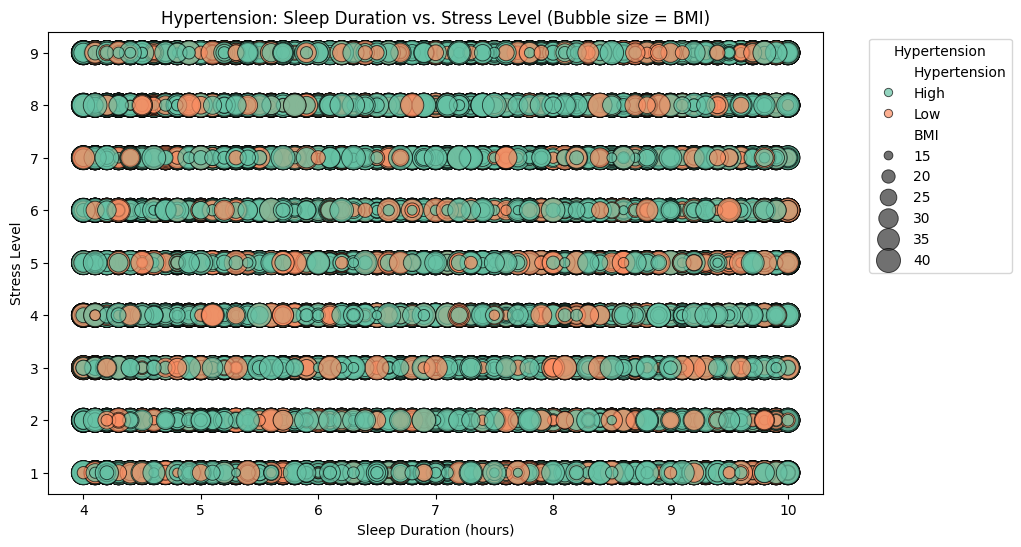

In [115]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=Hypertension,
    x='Sleep_Duration',
    y='Stress_Level',
    size='BMI',
    hue='Hypertension',
    palette='Set2',
    sizes=(40, 300),
    alpha=0.7,
    edgecolor='black'
)
plt.title("Hypertension: Sleep Duration vs. Stress Level (Bubble size = BMI)")
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Stress Level")
plt.legend(title='Hypertension', bbox_to_anchor=(1.05, 1), loc='upper left')



#Plot shows high BMI for those with higher stress levels. Shows the contrary for those with Low BMI.

PRINCIPAL COMPONENT ANALYSIS (PCA):


Kidney Dataset - Variance explained by 1st PC: 2.88%


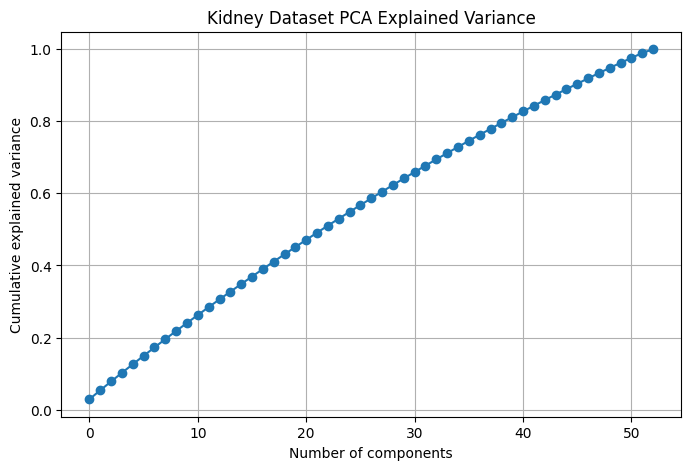

In [116]:
Kidney_num = Kidney.select_dtypes(include=['number']).dropna()
scaler = StandardScaler()
Kidney_scaled = scaler.fit_transform(Kidney_num )
pca = PCA()
Kidney_pca = pca.fit_transform(Kidney_scaled)

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Kidney Dataset PCA Explained Variance')
plt.grid(True)
print(f"Kidney Dataset - Variance explained by 1st PC: {pca.explained_variance_ratio_[0]:.2%}")

Diabetes Dataset - Variance explained by 1st PC: 16.71%


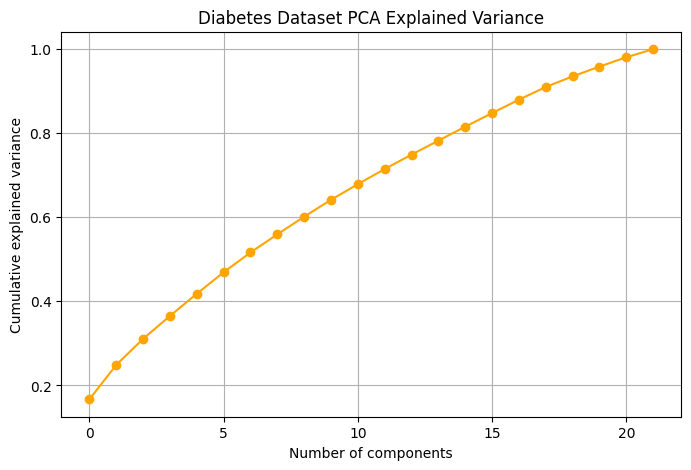

In [117]:
Diabetes_numeric = Diabetes.select_dtypes(include=['number']).dropna()

Diabetes_scaled = scaler.fit_transform(Diabetes_numeric)
pca = PCA()
Diabetes_pca = pca.fit_transform(Diabetes_scaled)

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', color='orange')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Diabetes Dataset PCA Explained Variance')
plt.grid(True)
print(f"Diabetes Dataset - Variance explained by 1st PC: {pca.explained_variance_ratio_[0]:.2%}")

Hypertension Dataset - Variance explained by 1st PC: 7.26%


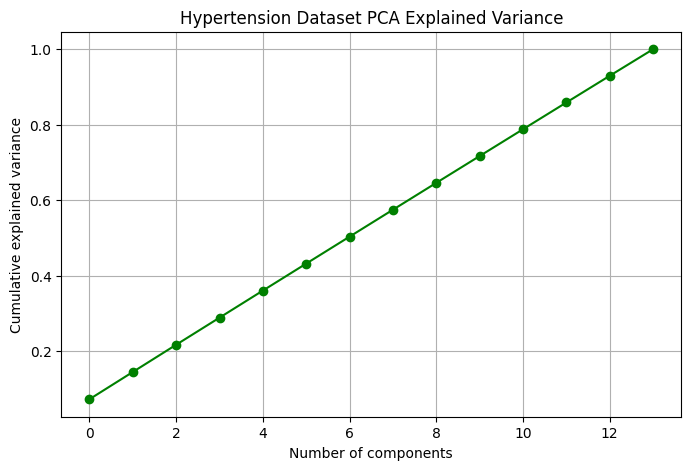

In [118]:
Hypertension_numeric = Hypertension.select_dtypes(include=['number']).dropna()
Hypertension_scaled = scaler.fit_transform(Hypertension_numeric)
pca = PCA()
Hypertension_pca = pca.fit_transform(Hypertension_scaled)

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', color='green')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Hypertension Dataset PCA Explained Variance')
plt.grid(True)
print(f"Hypertension Dataset - Variance explained by 1st PC: {pca.explained_variance_ratio_[0]:.2%}")

Linear Regression:


In [119]:

Kidney_X = Kidney[['Age', 'SerumCreatinine', 'BUNLevels', 'SystolicBP', 'DiastolicBP']].dropna()
Kidney_y = Kidney.loc[Kidney_X.index, 'GFR']

model = LinearRegression().fit(Kidney_X, Kidney_y)

print("Kidney Dataset Linear Regression")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R² Score:", model.score(Kidney_X, Kidney_y))

Kidney Dataset Linear Regression
Coefficients: [ 0.06431117 -0.03812173 -0.08100018  0.00920323 -0.00213311]
Intercept: 64.62048572737653
R² Score: 0.003347983526773346


In [120]:
Diabetes_X = Diabetes[['BMI', 'Age', 'HighBP', 'HighChol', 'PhysActivity']].dropna()
Diabetes_y = Diabetes.loc[Diabetes_X.index, 'Diabetes_012']

model = LinearRegression().fit(Diabetes_X, Diabetes_y)

print("\nDiabetes Dataset Linear Regression")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R² Score:", model.score(Diabetes_X, Diabetes_y))


Diabetes Dataset Linear Regression
Coefficients: [ 0.01833549  0.02305558  0.22475257  0.15684082 -0.09504937]
Intercept: -0.499697878918124
R² Score: 0.13121744270399738


In [121]:
from sklearn.linear_model import LinearRegression

Hypertension_X = Hypertension[['Age', 'BMI', 'Cholesterol', 'Diastolic_BP']].dropna()
Hypertension_y = Hypertension.loc[Hypertension_X.index, 'Systolic_BP']
model = LinearRegression().fit(Hypertension_X, Hypertension_y)

print("\nHypertension Dataset Linear Regression (predicting Systolic_BP)")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R² Score:", model.score(Hypertension_X, Hypertension_y))


#Variables do not sufficiently explain variation in systolic BP within this dataset. 


Hypertension Dataset Linear Regression (predicting Systolic_BP)
Coefficients: [-0.00209914 -0.00712062 -0.00176516  0.00410343]
Intercept: 134.8425935142278
R² Score: 2.26768476878636e-05


Outliers:


Kidney dataset outliers count: 0


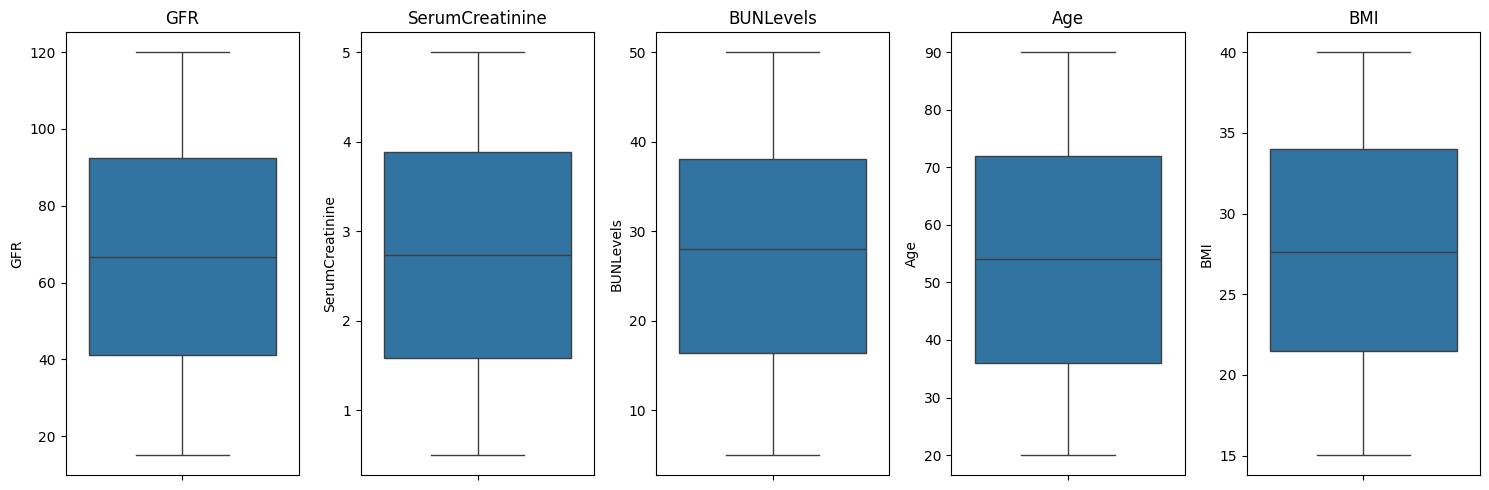

In [122]:
kidney_numeric = ['GFR', 'SerumCreatinine', 'BUNLevels', 'Age', 'BMI']
plt.figure(figsize=(15, 5))
for i, col in enumerate(kidney_numeric):
    plt.subplot(1, len(kidney_numeric), i + 1)
    sns.boxplot(y=Kidney[col])
    plt.title(col)
plt.tight_layout()

from scipy.stats import zscore
kidney_z = np.abs(zscore(Kidney[kidney_numeric].dropna()))
kidney_outliers = (kidney_z > 3).any(axis=1)
print(f"Kidney dataset outliers count: {kidney_outliers.sum()}")

In [123]:
print("Income unique values:", Diabetes['Income'].unique())
print("PhysActivity unique values:", Diabetes['PhysActivity'].unique())
print("Diabetes_012 unique values:", Diabetes['Diabetes_012'].unique())

Income unique values: [3. 1. 8. 6. 4. 7. 2. 5.]
PhysActivity unique values: [0. 1.]
Diabetes_012 unique values: [0. 2. 1.]


Diabetes dataset outliers count: 2963


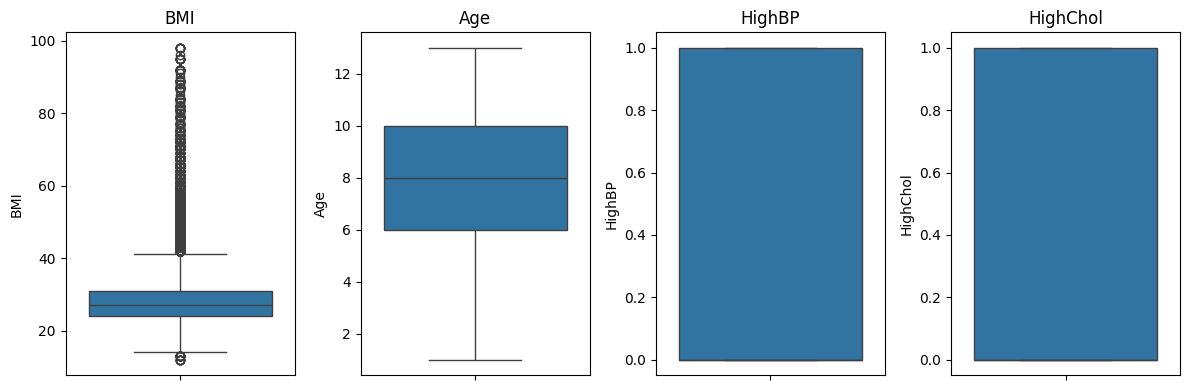

In [124]:
diabetes_numeric = ['BMI', 'Age', 'HighBP', 'HighChol']
plt.figure(figsize=(12, 4))
for i, col in enumerate(diabetes_numeric):
    plt.subplot(1, len(diabetes_numeric), i + 1)
    sns.boxplot(y=Diabetes[col])
    plt.title(col)
plt.tight_layout()

diabetes_z = np.abs(zscore(Diabetes[diabetes_numeric].dropna()))
diabetes_outliers = (diabetes_z > 3).any(axis=1)
print(f"Diabetes dataset outliers count: {diabetes_outliers.sum()}")

Hypertension dataset outliers count: 0


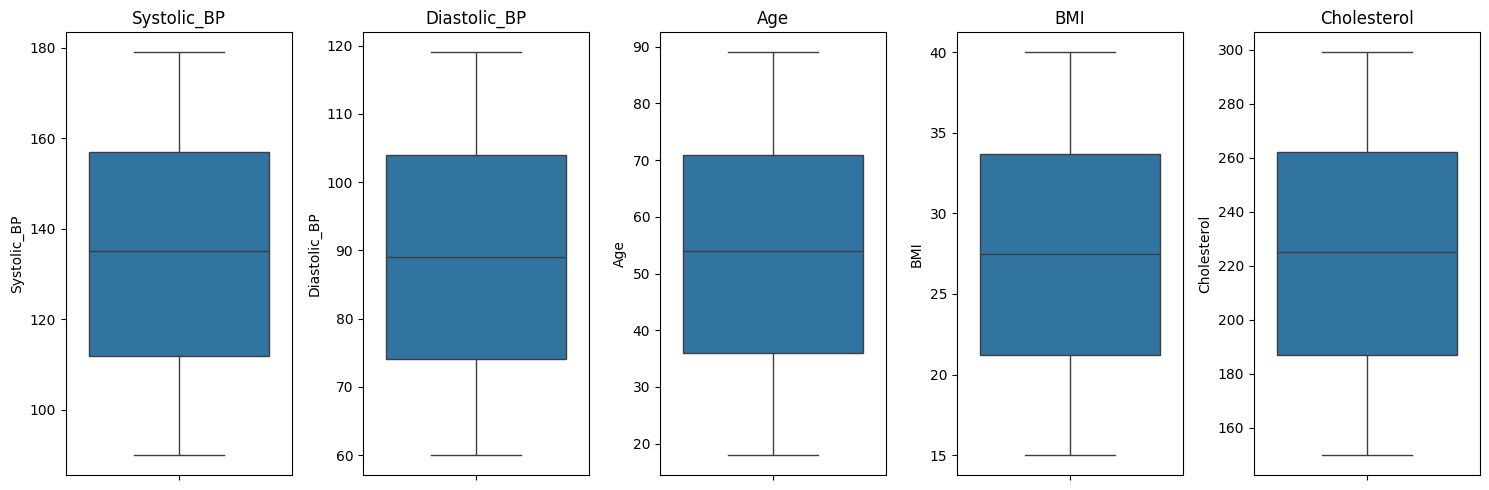

In [125]:
hypertension_numeric = ['Systolic_BP', 'Diastolic_BP', 'Age', 'BMI', 'Cholesterol']
plt.figure(figsize=(15, 5))
for i, col in enumerate(hypertension_numeric):
    plt.subplot(1, len(hypertension_numeric), i + 1)
    sns.boxplot(y=Hypertension[col])
    plt.title(col)
plt.tight_layout()

hypertension_z = np.abs(zscore(Hypertension[hypertension_numeric].dropna()))
hypertension_outliers = (hypertension_z > 3).any(axis=1)
print(f"Hypertension dataset outliers count: {hypertension_outliers.sum()}")

Conclusions: For the Kidney dataset, principal component analysis demonstrated that a few principal components capture a significant portion of the data variability, enabling effective dimensionality reduction for future analyses. Outliers in the dataset predominantly represent true clinical severity rather than data entry errors, suggesting that they should generally be retained to preserve the clinical relevance of the data. While linear regression models using kidney function markers, such as GFR and serum creatinine, showed some predictive relationships, their performance could be enhanced with the inclusion of additional relevant features to better explain variance in kidney health outcomes.

In the Diabetes dataset, logistic regression effectively modeled diabetes classification using key features like BMI and age, indicating that these are strong predictors of diabetes status in the population studied. The outliers observed in BMI and age reflect real-world variability, particularly among individuals with extremely high BMI who are at greater risk of developing diabetes, and thus are important to retain in the dataset for accurate representation. PCA further identified major patterns associated with diabetes risk factors, supporting dimensionality reduction without significant loss of information.

For the Hypertension dataset, linear regression was instead used to predict systolic blood pressure. However, this model explained very little variance, indicating that the selected predictors did not meaningfully capture variations in systolic BP. Although outliers in blood pressure and cholesterol levels were present, they did not substantially affect model performance. To improve predictive modeling for hypertension in this dataset, additional features capturing lifestyle, genetic, or medication-related factors, as well as the inclusion of accurate diagnostic labels, would be necessary.



# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

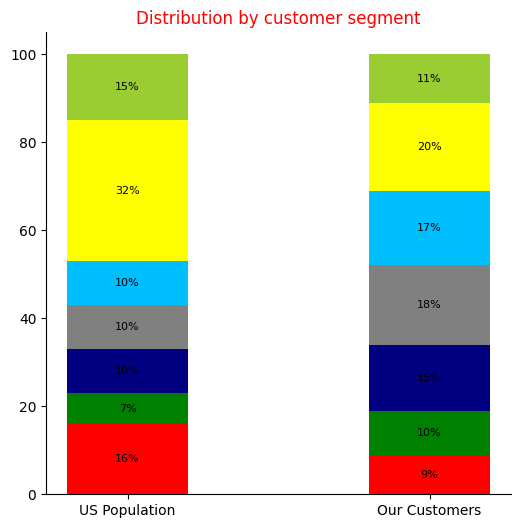

In [126]:
segments = ['Segment 1', 'Segment 2', 'Segment 3', 'Segment 4', 'Segment 5', 'Segment 6', 'Segment 7']
us_population = [16, 7, 10, 10, 10, 32, 15]
our_customers = [9, 10, 15, 18, 17, 20, 11]
colors = ['red', 'green', 'navy', 'gray', 'deepskyblue', 'yellow', 'yellowgreen']
plt.figure(figsize=(6,6))
bottom_us = 0
bottom_customers = 0
for i in range(len(segments)):
    plt.bar(0, us_population[i], bottom=bottom_us, color=colors[i], width=0.4)
    plt.text(0, bottom_us + us_population[i]/2, f"{us_population[i]}%", ha='center', va='center', fontsize=8)
    bottom_us += us_population[i]
    plt.bar(1, our_customers[i], bottom=bottom_customers, color=colors[i], width=0.4)
    plt.text(1, bottom_customers + our_customers[i]/2, f"{our_customers[i]}%", ha='center', va='center', fontsize=8)
    bottom_customers += our_customers[i]
plt.xticks([0,1], ['US Population', 'Our Customers'])

plt.title('Distribution by customer segment', color='red')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)